In [136]:
import numpy as np
import pandas as pd
import seaborn as sns

In [137]:
df=pd.read_csv('ai_stockmarket_dataset.csv')
df.shape
df.columns
df.info
df.head(2)

,Date,Ticker,Open,Close,Adj Close,High,Low,Volume,Daily_Return,Log_Return,Rolling_Volatility_20d,Market_Cap,P/E_Ratio,Beta,Sector,Industry,Market_Phase,Post_ChatGPT
0,2022-01-03 00:00:00,AMD,145.139999,150.240005,150.240005,151.649994,145.020004,59396600.0,NaN,NaN,NaN,2.500000e+11,21.440416,1.8,Semiconductors,Semiconductor Design,1,0
1,2022-01-03 00:00:00,AVGO,66.632004,66.332001,66.332001,67.169998,66.122002,22591000.0,NaN,NaN,NaN,6.000000e+11,34.744500,1.4,Semiconductors,Semiconductor Solutions,1,0


In [138]:
df.isnull().sum()
df_eda = df.copy()

In [139]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,8338.0,1.721136e+02,1.491780e+02,3.475000e+00,5.511600e+01,1.222050e+02,2.666625e+02,6.076900e+02
Close,8338.0,1.712243e+02,1.501825e+02,-4.880700e+02,5.486250e+01,1.221867e+02,2.662625e+02,6.078100e+02
Adj Close,8338.0,1.721016e+02,1.491761e+02,3.483000e+00,5.521500e+01,1.224400e+02,2.668050e+02,6.078100e+02
High,8338.0,1.739920e+02,1.499342e+02,3.562000e+00,5.598100e+01,1.243300e+02,2.700225e+02,6.090700e+02
Low,8338.0,1.700998e+02,1.483047e+02,3.411000e+00,5.422925e+01,1.203560e+02,2.632175e+02,6.070200e+02
Volume,7922.0,1.014088e+08,8.109244e+08,0.000000e+00,1.393768e+07,3.099805e+07,6.498062e+07,5.515914e+10
Daily_Return,8326.0,7.320886e-02,3.979420e+00,-5.714890e+01,-1.331882e+00,5.118683e-02,1.433480e+00,5.732053e+01
Log_Return,8326.0,5.022689e-04,2.932769e-02,-3.956397e-01,-1.332505e-02,5.217377e-04,1.418095e-02,3.070162e-01
Rolling_Volatility_20d,8281.0,2.553647e+00,1.461045e+00,3.657932e-01,1.669226e+00,2.306273e+00,3.145680e+00,1.473059e+01
Market_Cap,8088.0,8.154649e+11,1.483327e+12,5.400108e+09,1.091172e+11,1.800000e+11,5.217188e+11,7.500000e+12


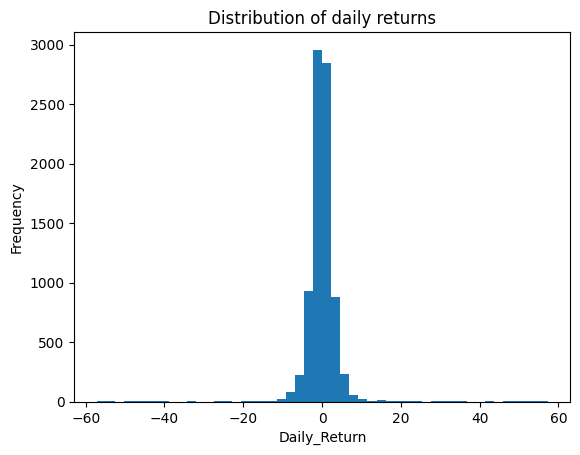

In [140]:
import matplotlib.pyplot as plt
plt.hist(df['Daily_Return'].dropna(),bins=50)
plt.title('Distribution of daily returns')
plt.xlabel('Daily_Return')
plt.ylabel('Frequency')
plt.show()

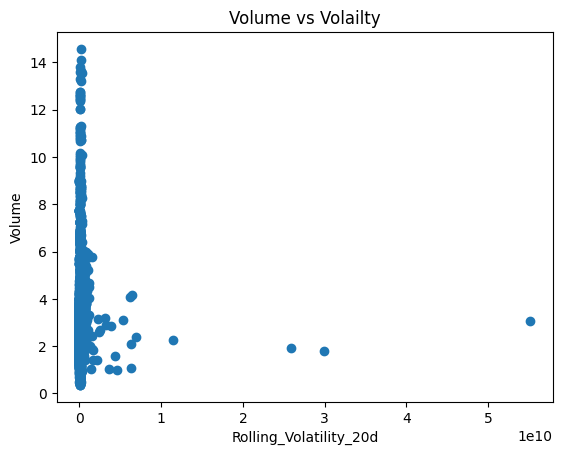

In [141]:
plt.scatter(df['Volume'] , df['Rolling_Volatility_20d'])
plt.xlabel('Rolling_Volatility_20d')
plt.ylabel('Volume')
plt.title('Volume vs Volailty')
plt.show()

In [142]:
x =df.groupby('Sector')['Rolling_Volatility_20d'].mean().sort_values()

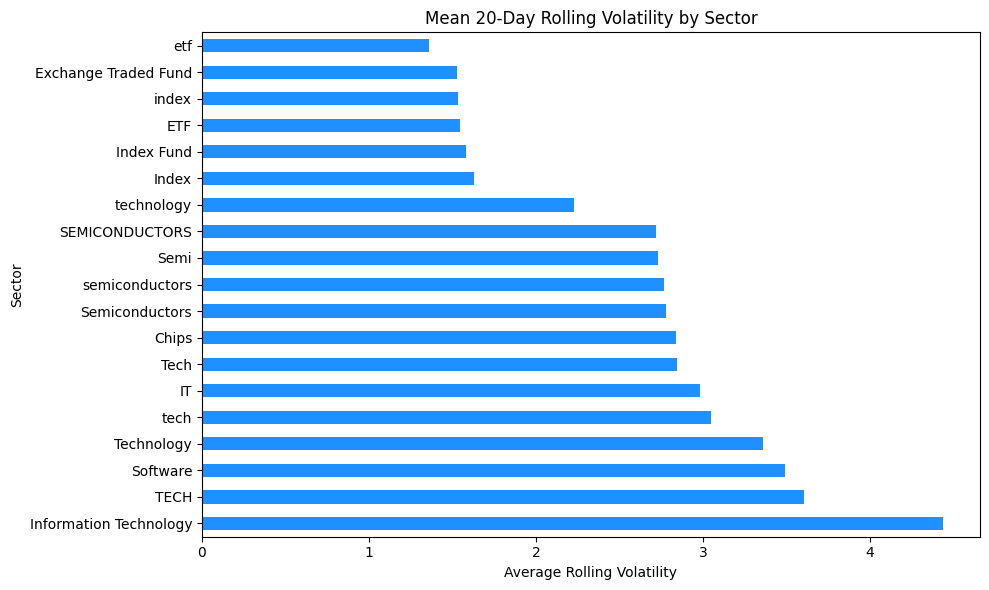

In [143]:
x.plot(kind='barh', figsize=(10, 6), color='dodgerblue')

plt.title('Mean 20-Day Rolling Volatility by Sector')
plt.xlabel('Average Rolling Volatility')
plt.ylabel('Sector')
plt.gca().invert_yaxis() # Invert to show lowest volatility at the top, like the sorted series
plt.tight_layout()
plt.show()

In [144]:
 df.groupby('Post_ChatGPT')['Rolling_Volatility_20d'].mean()

Post_ChatGPT
0    2.804317
1    2.446483
Name: Rolling_Volatility_20d, dtype: float64

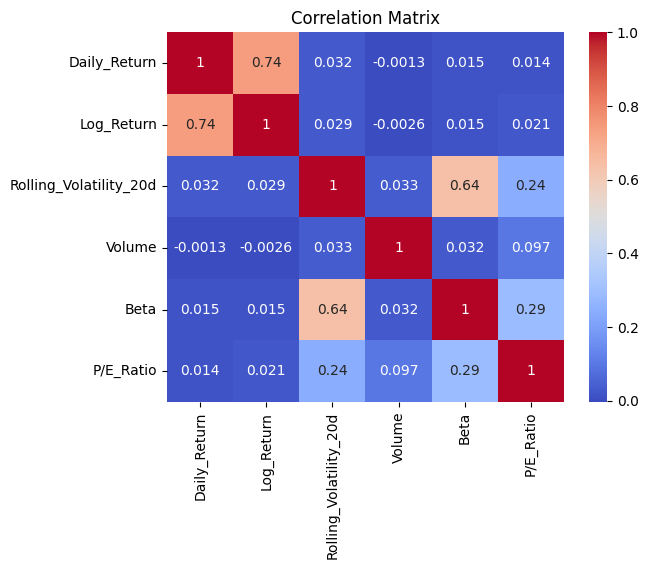

In [145]:
import seaborn as sns

corr = df[['Daily_Return', 'Log_Return', 'Rolling_Volatility_20d', 'Volume', 'Beta', 'P/E_Ratio']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [146]:
#Handling missing values
df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df))*100
missing_percent.sort_values(ascending=False)


P/E_Ratio                 6.920125
Volume                    4.989206
Market_Cap                2.998321
Rolling_Volatility_20d    0.683617
Log_Return                0.143919
Daily_Return              0.143919
Ticker                    0.000000
Date                      0.000000
High                      0.000000
Open                      0.000000
Low                       0.000000
Close                     0.000000
Adj Close                 0.000000
Beta                      0.000000
Sector                    0.000000
Industry                  0.000000
Market_Phase              0.000000
Post_ChatGPT              0.000000
dtype: float64

In [160]:
num_cols = df.select_dtypes(include =[ 'int64', 'float64']).columns
cat_cols = df.select_dtypes(include = ['object'])
num_cols

Index(['Open', 'Close', 'Adj Close', 'High', 'Low', 'Volume', 'Daily_Return',
       'Log_Return', 'Rolling_Volatility_20d', 'Market_Cap', 'P/E_Ratio',
       'Beta', 'Market_Phase', 'Post_ChatGPT'],
      dtype='object')

In [162]:
df[num_cols].skew().sort_values(ascending=False)


Volume                    51.918107
P/E_Ratio                  7.537616
Market_Cap                 2.888585
Rolling_Volatility_20d     2.416951
Low                        0.993320
Adj Close                  0.982963
Open                       0.982573
High                       0.972450
Close                      0.926628
Market_Phase               0.152754
Beta                       0.144064
Log_Return                 0.036520
Daily_Return              -0.027911
Post_ChatGPT              -0.850975
dtype: float64

In [157]:
df['Daily_Return'].skew() # we apply mean

np.float64(-0.027910581421614133)

In [149]:
df['Log_Return'].skew() #we apply mean

np.float64(0.03651981012406775)

In [150]:
df['Rolling_Volatility_20d'].skew() # we apply median

np.float64(2.405946147624445)

In [151]:
df['Market_Cap'].skew() # we apply median

np.float64(2.8321574301269297)

In [152]:
df['P/E_Ratio'].skew() # we apply median

np.float64(7.272839754946858)

In [153]:
df['Volume'].skew() #we apply median

np.float64(50.622453076942236)

In [163]:
skewed_cols = df[num_cols].skew()[abs(df[num_cols].skew()) > 0.5].index

for col in skewed_cols:
    df[col] = df[col].fillna(df[col].median())


In [164]:
skewed_cols = df[num_cols].skew()[abs(df[num_cols].skew()) < 0.5].index

for col in skewed_cols:
    df[col] = df[col].fillna(df[col].mean())


In [165]:
df.isnull().sum()

Date                      0
Ticker                    0
Open                      0
Close                     0
Adj Close                 0
High                      0
Low                       0
Volume                    0
Daily_Return              0
Log_Return                0
Rolling_Volatility_20d    0
Market_Cap                0
P/E_Ratio                 0
Beta                      0
Sector                    0
Industry                  0
Market_Phase              0
Post_ChatGPT              0
dtype: int64

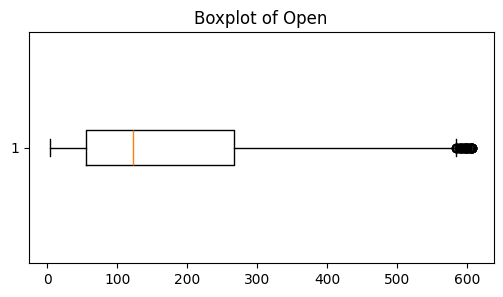

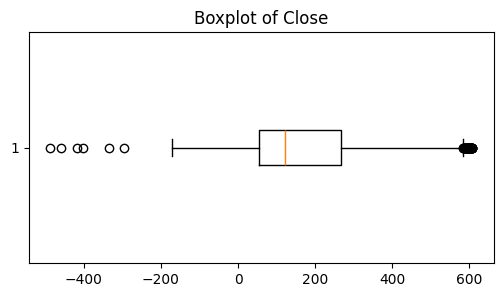

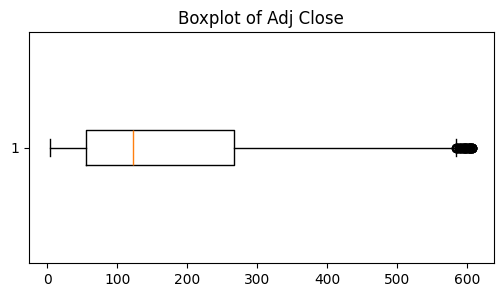

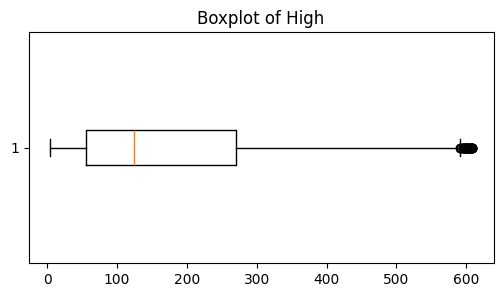

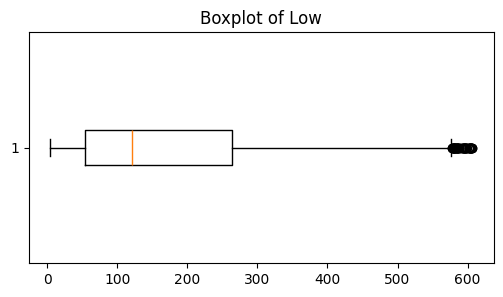

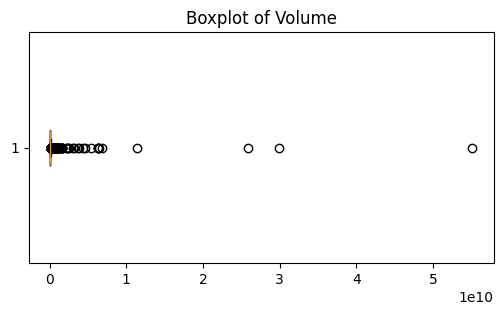

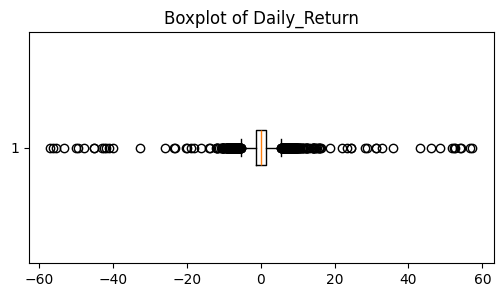

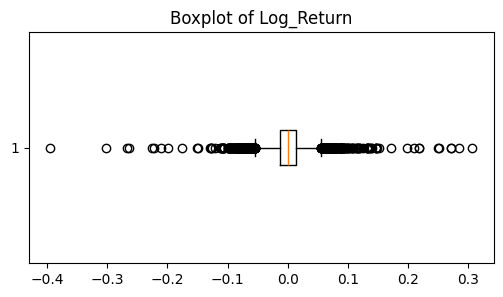

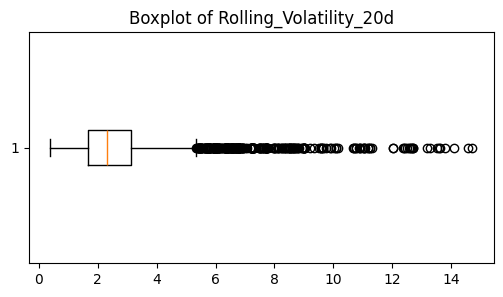

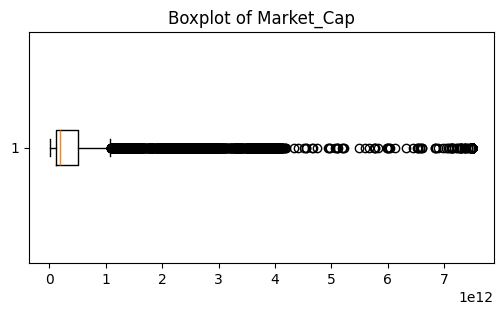

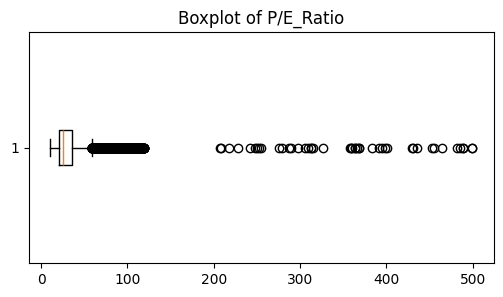

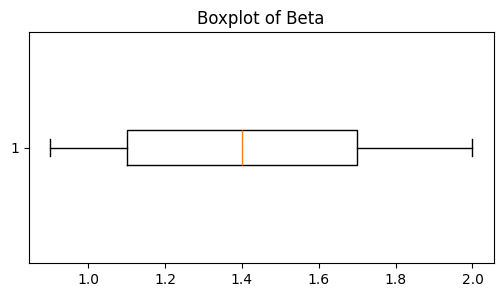

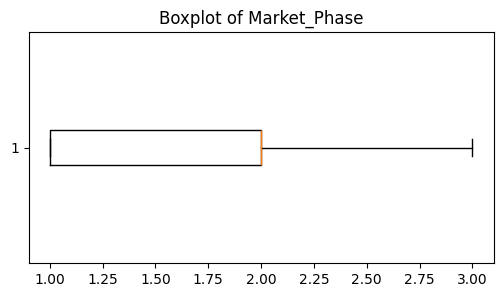

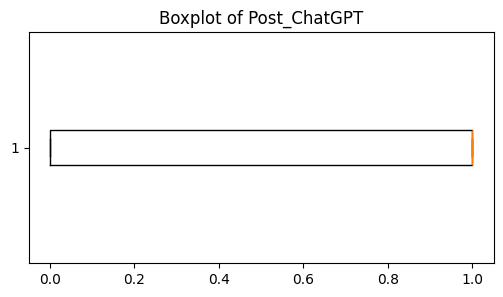

In [169]:
#handling outliers
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.show()



In [175]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers


In [178]:
for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {outliers.shape[0]} outliers")


Open: 39 outliers
Close: 46 outliers
Adj Close: 39 outliers
High: 33 outliers
Low: 48 outliers
Volume: 857 outliers
Daily_Return: 460 outliers
Log_Return: 448 outliers
Rolling_Volatility_20d: 300 outliers
Market_Cap: 1678 outliers
P/E_Ratio: 819 outliers
Beta: 0 outliers
Market_Phase: 0 outliers
Post_ChatGPT: 0 outliers


In [179]:
from feature_engine.outliers import Winsorizer

winsor = Winsorizer(
    capping_method='iqr',
    tail='both',
    fold=1.5
)

df[num_cols] = winsor.fit_transform(df[num_cols])


In [180]:
for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {outliers.shape[0]} outliers")

Open: 0 outliers
Close: 0 outliers
Adj Close: 0 outliers
High: 0 outliers
Low: 0 outliers
Volume: 0 outliers
Daily_Return: 0 outliers
Log_Return: 0 outliers
Rolling_Volatility_20d: 0 outliers
Market_Cap: 0 outliers
P/E_Ratio: 0 outliers
Beta: 0 outliers
Market_Phase: 0 outliers
Post_ChatGPT: 0 outliers


In [223]:
#HANDLING IMBALANCED DATA
target = 'Market_Phase'

X = df.drop(target, axis=1)
y = df[target]


In [188]:
y.value_counts()
X_num = X.select_dtypes(include=['int64', 'float64'])


In [189]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_num, y)


In [190]:
y_resampled.value_counts()


Market_Phase
1    4180
2    4180
3    4180
Name: count, dtype: int64

In [193]:
target = 'Post_ChatGPT'
x = df.drop(target , axis=1)
y = df[target]
y.value_counts()
x_num = x.select_dtypes(include=['int64' , 'float64'])
sm = SMOTE(random_state = 43)
x_re , y_re = sm.fit_resample(x_num , y )

In [194]:
y_re.value_counts()

Post_ChatGPT
0    5801
1    5801
Name: count, dtype: int64

In [195]:
#converting cat cols to num cols
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols


Index(['Date', 'Ticker', 'Sector', 'Industry'], dtype='object')

In [200]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded = encoder.fit_transform(df[['Sector']])
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['Sector'])
)

df = pd.concat([df.drop('Sector', axis=1), encoded_df], axis=1)


In [201]:
df.head()
df.shape


(8338, 35)

In [209]:
df.columns


Index(['Date', 'Ticker', 'Open', 'Close', 'Adj Close', 'High', 'Low', 'Volume',
       'Daily_Return', 'Log_Return', 'Rolling_Volatility_20d', 'Market_Cap',
       'P/E_Ratio', 'Beta', 'Market_Phase', 'Post_ChatGPT', 'Sector_ETF',
       'Sector_Exchange Traded Fund', 'Sector_IT', 'Sector_Index',
       'Sector_Index Fund', 'Sector_Information Technology',
       'Sector_SEMICONDUCTORS', 'Sector_Semi', 'Sector_Semiconductors',
       'Sector_Software', 'Sector_TECH', 'Sector_Tech', 'Sector_Technology',
       'Sector_etf', 'Sector_index', 'Sector_semiconductors', 'Sector_tech',
       'Sector_technology', 'Industry_encoded'],
      dtype='object')

In [211]:
df[['Industry_encoded', 'Market_Phase']].head()


Industry_encoded    15760.0
Market_Phase        15760.0
dtype: float64

In [217]:
# features scaling 

num_features = df.select_dtypes(include=['int64', 'float64'])
num_features = num_features.drop(['Market_Phase', 'Post_ChatGPT'], axis=1)



In [218]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_features)

df_scaled = pd.DataFrame(
    scaled_data,
    columns=num_features.columns,
    index=df.index
)


In [219]:
df_scaled['Market_Phase'] = df['Market_Phase']
df_scaled['Post_ChatGPT'] = df['Post_ChatGPT']


In [220]:
df_scaled.head()
df_scaled.describe()


,Open,Close,Adj Close,High,Low,Volume,Daily_Return,Log_Return,Rolling_Volatility_20d,Market_Cap,...,Sector_Tech,Sector_Technology,Sector_etf,Sector_index,Sector_semiconductors,Sector_tech,Sector_technology,Industry_encoded,Market_Phase,Post_ChatGPT
count,8.338000e+03,8.338000e+03,8.338000e+03,8.338000e+03,8.338000e+03,8.338000e+03,8.338000e+03,8.338000e+03,8.338000e+03,8.338000e+03,...,8.338000e+03,8.338000e+03,8.338000e+03,8.338000e+03,8.338000e+03,8.338000e+03,8.338000e+03,8.338000e+03,8338.000000,8338.000000
mean,5.453914e-17,6.817393e-17,-2.726957e-17,4.090436e-17,-4.090436e-17,1.533913e-17,3.408696e-18,2.386087e-17,1.363479e-17,2.045218e-17,...,-3.366088e-17,9.160871e-17,-1.746957e-17,1.150435e-17,3.408696e-18,3.451305e-17,-3.280870e-17,-1.526457e-16,1.890142,0.695730
std,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,...,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,0.697618,0.460125
min,-1.131443e+00,-2.896741e+00,-1.131296e+00,-1.137375e+00,-1.125290e+00,-1.116432e+00,-2.319605e+00,-2.326932e+00,-1.841990e+00,-9.539891e-01,...,-8.932370e-02,-4.580485e-01,-7.029612e-02,-6.676297e-02,-9.134779e-02,-5.804683e-02,-4.903493e-02,-1.818282e+00,1.000000,0.000000
25%,-7.848400e-01,-7.777892e-01,-7.840902e-01,-7.874692e-01,-7.820464e-01,-7.474589e-01,-5.829409e-01,-5.817823e-01,-6.959914e-01,-6.795358e-01,...,-8.932370e-02,-4.580485e-01,-7.029612e-02,-6.676297e-02,-9.134779e-02,-5.804683e-02,-4.903493e-02,-5.058930e-01,1.000000,0.000000
50%,-3.345537e-01,-3.279101e-01,-3.329012e-01,-3.312274e-01,-3.354036e-01,-3.427442e-01,-2.535297e-03,3.176614e-03,-1.424933e-01,-5.023674e-01,...,-8.932370e-02,-4.580485e-01,-7.029612e-02,-6.676297e-02,-9.134779e-02,-5.804683e-02,-4.903493e-02,1.897099e-01,2.000000,1.000000
75%,6.350127e-01,6.348452e-01,6.360227e-01,6.412959e-01,6.295320e-01,4.428629e-01,5.748353e-01,5.816510e-01,5.869761e-01,3.259433e-01,...,-8.932370e-02,-4.580485e-01,-7.029612e-02,-6.676297e-02,-9.134779e-02,-5.804683e-02,-4.903493e-02,8.853128e-01,2.000000,1.000000
max,2.764792e+00,2.753797e+00,2.766192e+00,2.784443e+00,2.746900e+00,2.228346e+00,2.311500e+00,2.326801e+00,2.511427e+00,1.834162e+00,...,1.119524e+01,2.183175e+00,1.422554e+01,1.497836e+01,1.094717e+01,1.722747e+01,2.039363e+01,1.580916e+00,3.000000,1.000000


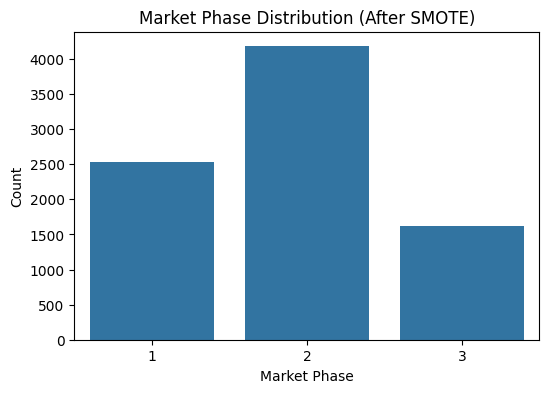

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Market_Phase', data=df_scaled)
plt.title('Market Phase Distribution (After SMOTE)')
plt.xlabel('Market Phase')
plt.ylabel('Count')
plt.show()


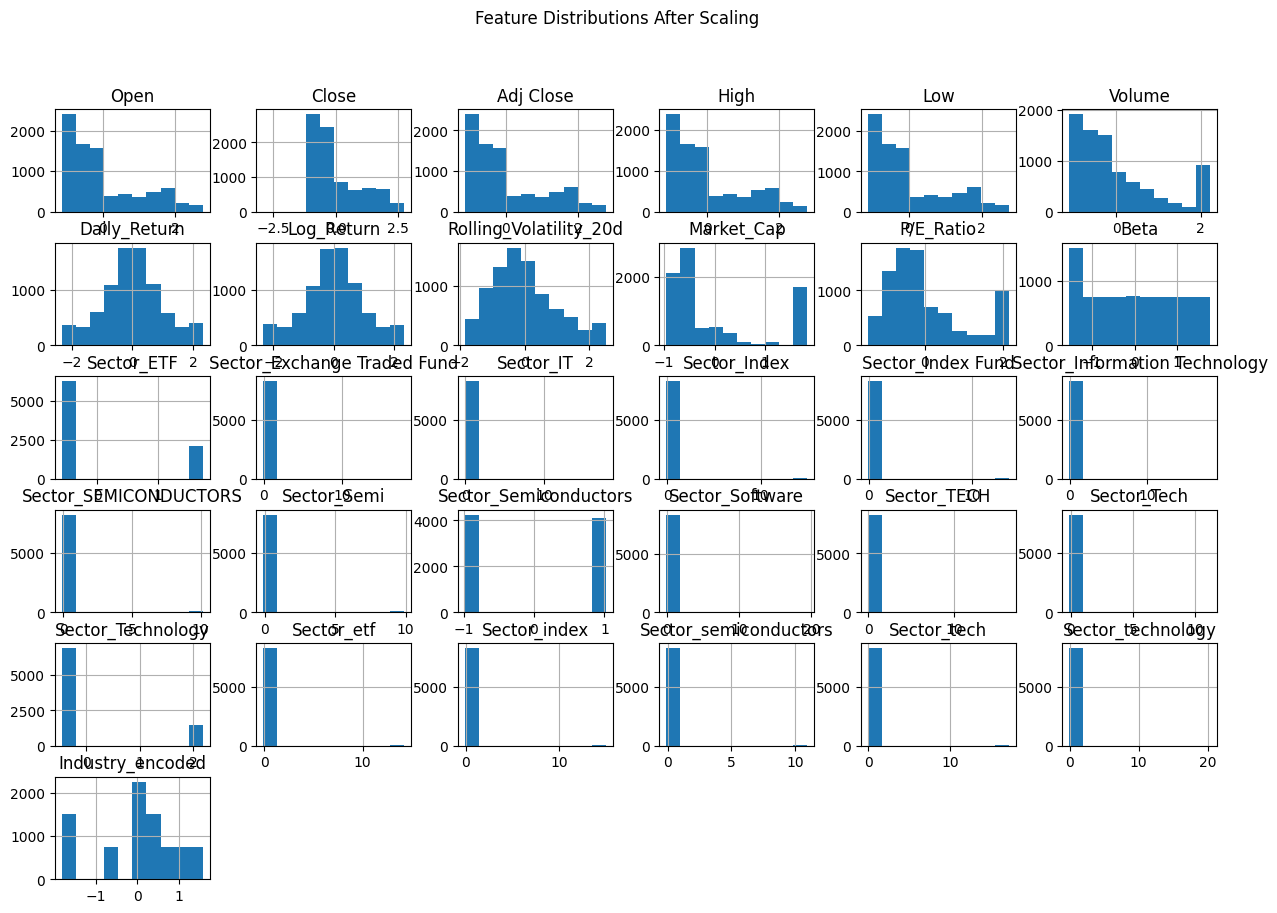

In [224]:
num_cols = df_scaled.drop(['Market_Phase', 'Post_ChatGPT'], axis=1).columns

df_scaled[num_cols].hist(bins=10, figsize=(15,10))
plt.suptitle('Feature Distributions After Scaling')
plt.show()


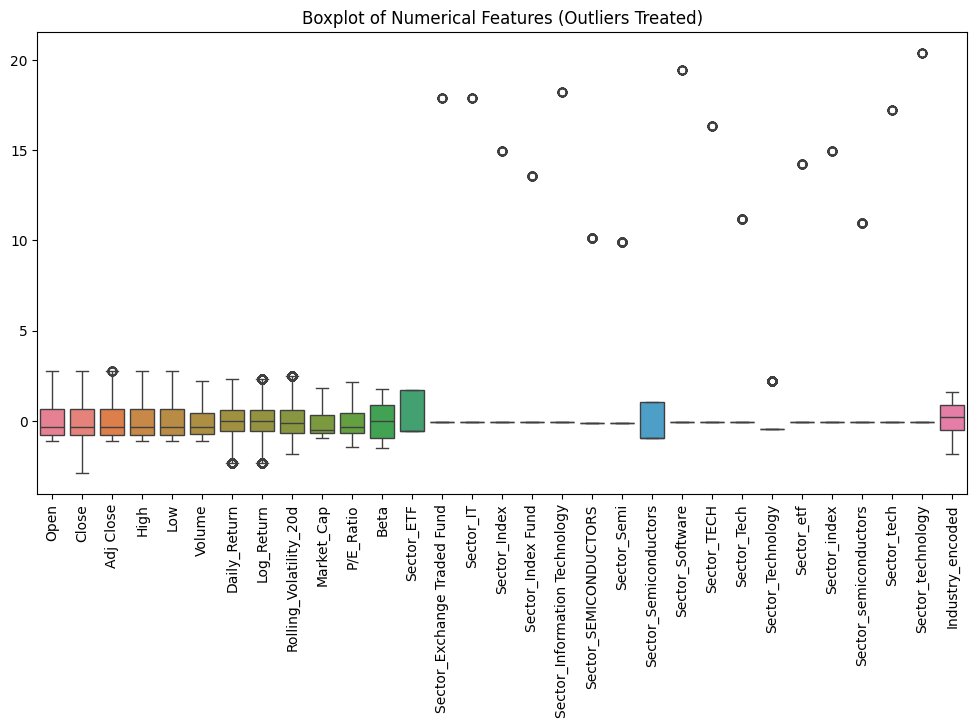

In [225]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_scaled[num_cols])
plt.xticks(rotation=90)
plt.title('Boxplot of Numerical Features (Outliers Treated)')
plt.show()


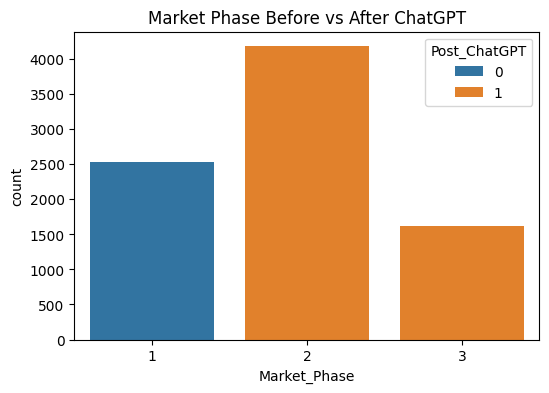

In [226]:
plt.figure(figsize=(6,4))
sns.countplot(x='Market_Phase', hue='Post_ChatGPT', data=df_scaled)
plt.title('Market Phase Before vs After ChatGPT')
plt.show()
